## Applying Dimensionality reduction techniques to the breast cancer dataset to train a machine learning model, and evaluate its performance.

## Principal Component Analysis(PCA)
The goal of Principal Component Analysis (PCA) when applied to the breast cancer dataset is to reduce the dimensionality of the dataset while retaining as much variance as possible. This means transforming the original high-dimensional data into a new set of uncorrelated variables, called principal components, that capture the maximum amount of variability in the data.

In [83]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


In [6]:
#get datasets
from sklearn.datasets import load_breast_cancer


In [7]:
#load the dataset
cancer = load_breast_cancer()

In [8]:
#checking how datset is stored in the sklearn dataset
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
#print description of thedatsset
print (cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

2. Convert to dataframe
Convert data to a pandas dataframe for easy data manipulation and exploration


In [18]:
df = pd.DataFrame(cancer.data,columns =cancer.feature_names)

#add target column
df['target']= cancer.target

#display the first 5 rows of the dataset
df.head



<bound method NDFrame.head of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean conca

Data Analysis
check for any missing value and get summary statistics

In [20]:
#check for missing value
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [21]:
#get summary statistics
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


4. Visualize

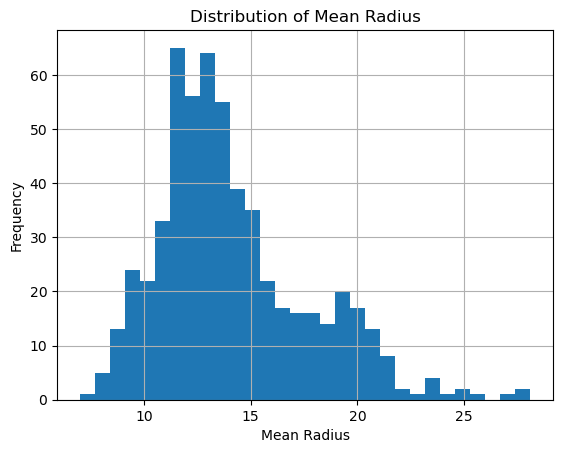

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of one feature
df['mean radius'].hist(bins=30)
plt.title('Distribution of Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.show()



Normalize and standandize

In [24]:
from sklearn.preprocessing import MiniMaxScaler


ImportError: cannot import name 'MiniMaxScaler' from 'sklearn.preprocessing' (C:\Anaconda\Lib\site-packages\sklearn\preprocessing\__init__.py)

In [25]:
from sklearn.preprocessing import StandardScaler

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

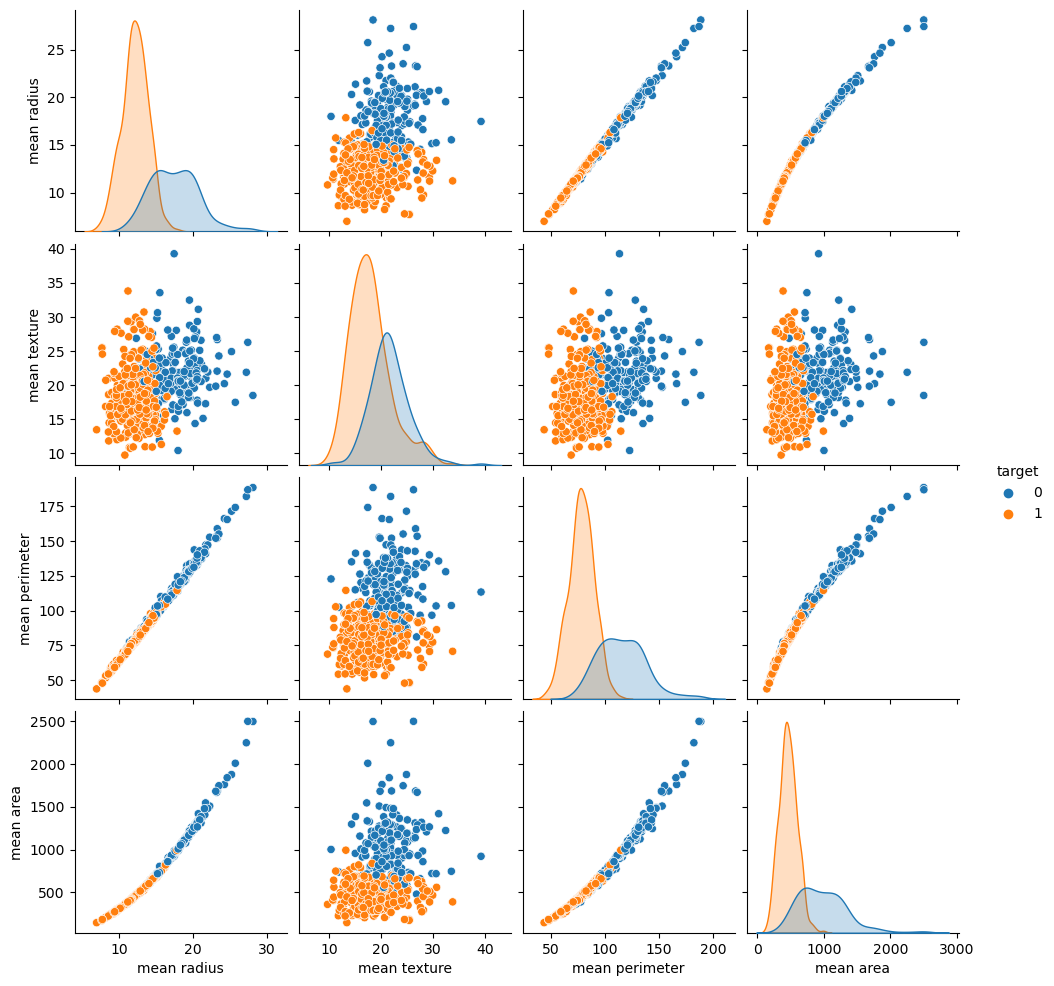

In [27]:
# Pair plot of a few features
sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']], hue='target')
plt.show()

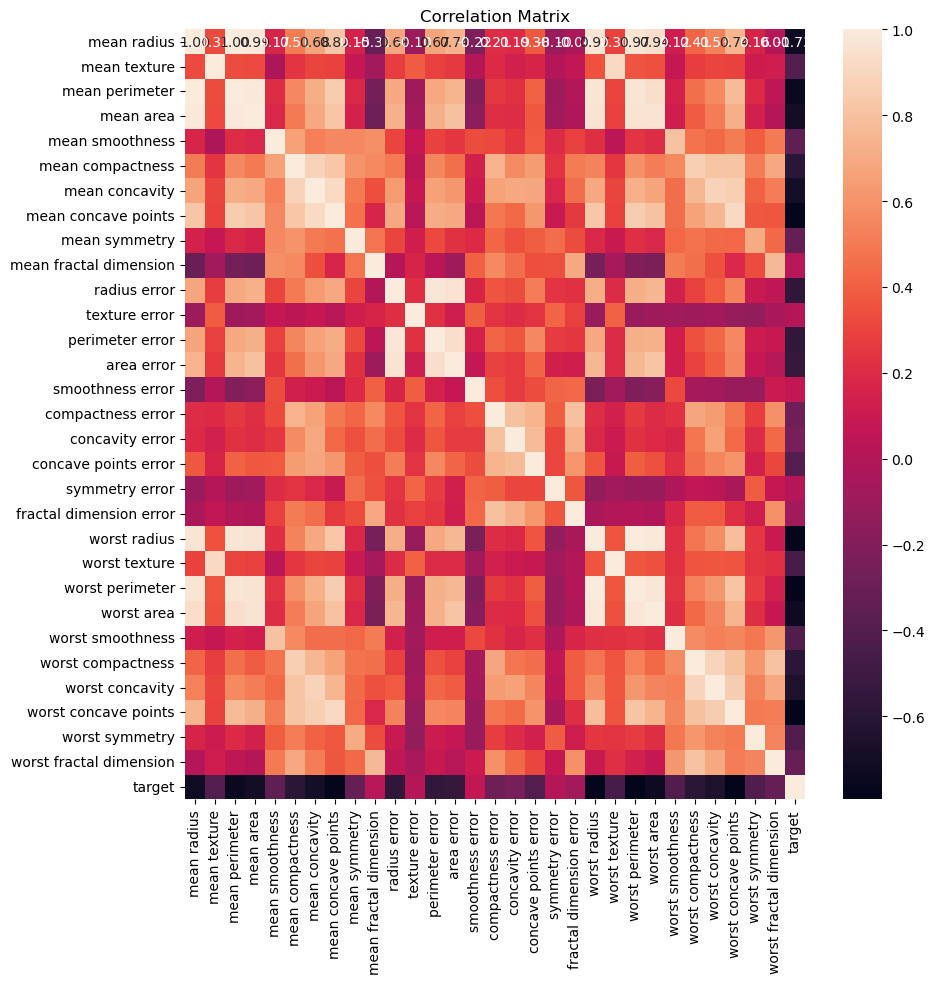

In [29]:
# Heatmap of correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [30]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [34]:
scaled_data=scaler.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.75062224,
         1.93701461, -1.29767572],
       [ 1.82982061, -0.35363241,  1.68595471, ..., -0.24388967,
         0.28118999, -1.29767572],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.152255  ,
         0.20139121, -1.29767572],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ..., -1.10454895,
        -0.31840916, -1.29767572],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  1.91908301,
         2.21963528, -1.29767572],
       [-1.80840125,  1.22179204, -1.81438851, ..., -0.04813821,
        -0.75120669,  0.77060855]])

In [35]:
# Applying PCA
from sklearn.decomposition import PCA

In [42]:
#create pca object with the number of components you want to use
# Separating out the features and the target variable
X = df.drop(['target'], axis=1)
y = df['target']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
pca.fit(scaled_data)

PCA(n_components=2)

In [53]:
x_pca = pca.transform(scaled_data)

In [50]:
scaled_data.shape

(569, 31)

In [54]:
x_pca.shape

(569, 2)

In [55]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.75062224,
         1.93701461, -1.29767572],
       [ 1.82982061, -0.35363241,  1.68595471, ..., -0.24388967,
         0.28118999, -1.29767572],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.152255  ,
         0.20139121, -1.29767572],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ..., -1.10454895,
        -0.31840916, -1.29767572],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  1.91908301,
         2.21963528, -1.29767572],
       [-1.80840125,  1.22179204, -1.81438851, ..., -0.04813821,
        -0.75120669,  0.77060855]])

In [56]:
x_pca

array([[ 9.22577011,  2.11619563],
       [ 2.6558016 , -3.78477586],
       [ 5.89249212, -1.00557896],
       ...,
       [ 1.53007727, -1.95887147],
       [10.40500789,  1.84907792],
       [-5.50486158, -0.76634841]])

In [44]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

In [45]:
# Creating a DataFrame with the principal components
df_pca = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
df_pca['target'] = y

In [95]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principalComponents , y, test_size=0.3, random_state=42)


In [97]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [99]:
# Make predictions
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



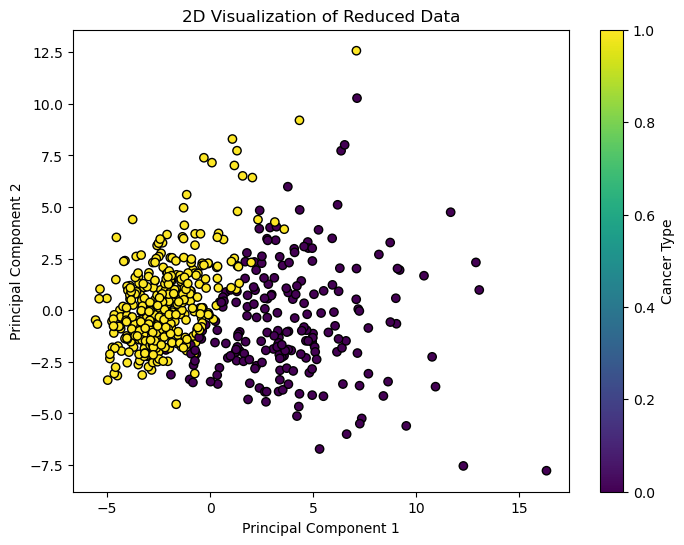

In [104]:
# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.colorbar(label='Cancer Type')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of Reduced Data')
plt.show()

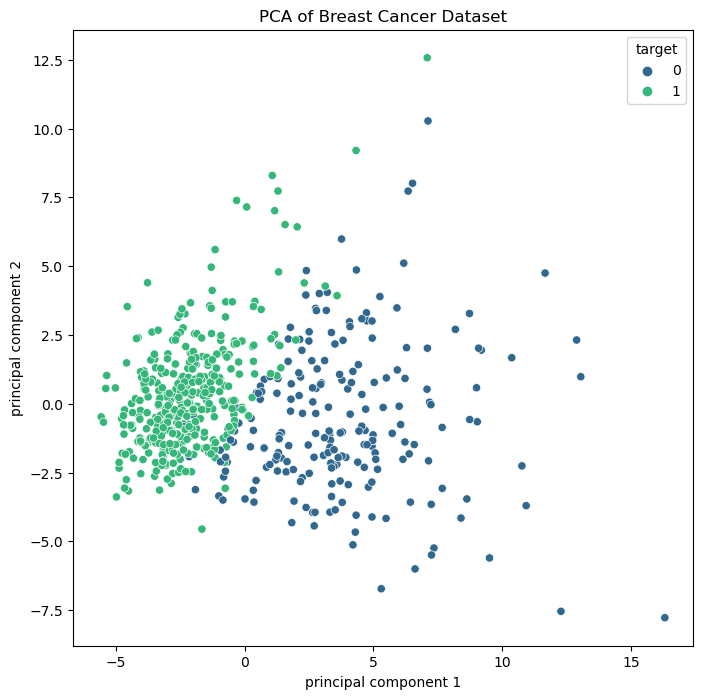

In [46]:
# Visualizing the PCA results
plt.figure(figsize=(8,8))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='target', data=df_pca, palette='viridis')
plt.title('PCA of Breast Cancer Dataset')
plt.show()

Factor Analysis

In [57]:
from sklearn.decomposition import FactorAnalysis

In [60]:
#perform factor analysis
n_components = 2 # Number of factors to extract
fa = FactorAnalysis(n_components = n_components, random_state = 0)
X_fa = fa.fit_transform(scaled_data)

In [62]:
#display the results
print(f"Original shape:{scaled_data.shape}")
print(f"Reduced shape : {X_fa.shape}")

Original shape:(569, 31)
Reduced shape : (569, 2)


In [63]:
X_fa

array([[ 1.18516867,  2.79761747],
       [ 1.76884408, -1.43557946],
       [ 1.57844568,  0.3995098 ],
       ...,
       [ 0.68730867, -0.47149224],
       [ 1.9069263 ,  2.47273466],
       [-1.80343209, -0.38481466]])

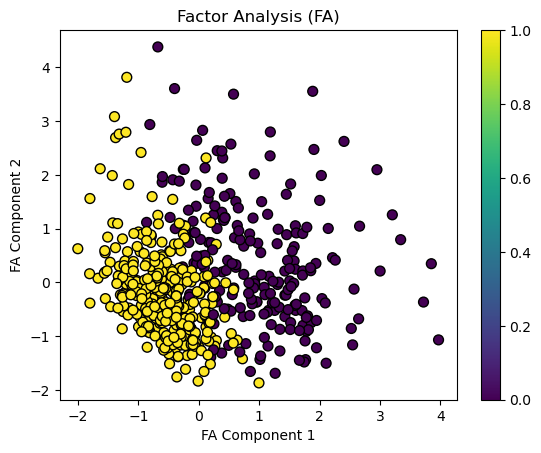

In [64]:
# Plot Factor Analysis
plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Factor Analysis (FA)')
plt.xlabel('FA Component 1')
plt.ylabel('FA Component 2')
plt.colorbar()

Linear Discriminant Analysis
Purpose: LDA is used for classification and dimensionality reduction.
Method: It finds a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier or, more commonly, for dimensionality reduction before later classification.
Application: LDA is often used in face recognition, bioinformatics, and marketing.
Output: Linear discriminants, which are linear combinations of the original features that best separate the classes

In [68]:
y = pd.DataFrame(cancer['target'])
y.tail

<bound method NDFrame.tail of      0
0    0
1    0
2    0
3    0
4    0
..  ..
564  0
565  0
566  0
567  0
568  1

[569 rows x 1 columns]>

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#perform linear discriminant analysis
lda = LinearDiscriminantAnalysis(n_components = 1)
X_lda = lda.fit_transform(scaled_data,y)



C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
# Display the results
print(f"Original shape: {X.shape}")
print(f"Reduced shape: {X_lda.shape}")

Original shape: (569, 30)
Reduced shape: (569, 1)


In [74]:
X_lda

array([[ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [-4.31776754e+14],
       [-4.31776754e+14],
       [-4.31776754e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [ 7.27095760e+14],
       [-4.31776754e+14],
       [ 7.2

In [77]:
X_lda[-6:-1]

array([[7.2709576e+14],
       [7.2709576e+14],
       [7.2709576e+14],
       [7.2709576e+14],
       [7.2709576e+14]])

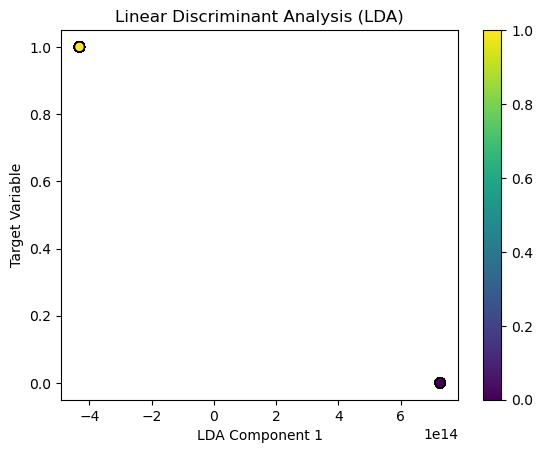

In [78]:
# plot LDA
plt.scatter(X_lda[:, 0], y, c=y, cmap='viridis', edgecolor='k', s=50) # Changed X_lda[:,1] to y for the y-axis
plt.title('Linear Discriminant Analysis (LDA)')
plt.xlabel('LDA Component 1')
plt.ylabel('Target Variable') # Changed y-axis label to reflect the change
plt.colorbar()

### t-SNE (t-Distributed Stochastic Neighbor Embedding)

    Purpose: Primarily used for visualization of high-dimensional data, especially to identify clusters and understand local structure.
    t-SNE: Uses a probability distribution to represent similarities between high-dimensional data points and reduces dimensions by minimizing the Kullback-Leibler divergence between these distributions.
    Application: Effective for exploratory data analysis, clustering, and revealing complex, non-linear relationships in data. Commonly used in machine learning and bioinformatics.
    Output: Provides a low-dimensional representation that preserves local neighborhoods and reveals clusters.


In [79]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=4)
X_tsne = tsne.fit_transform(scaled_data)

# Display the results
print(f"Original shape: {scaled_data.shape}")
print(f"Reduced shape: {X_tsne.shape}")

Original shape: (569, 31)
Reduced shape: (569, 2)


In [80]:
X_tsne

array([[ 37.312233  ,  -0.18306418],
       [ 28.258581  , -12.124274  ],
       [ 34.80886   ,  -3.324851  ],
       ...,
       [ 20.57896   , -13.179988  ],
       [ 35.587364  ,   0.9135369 ],
       [-28.057112  ,  -1.431407  ]], dtype=float32)

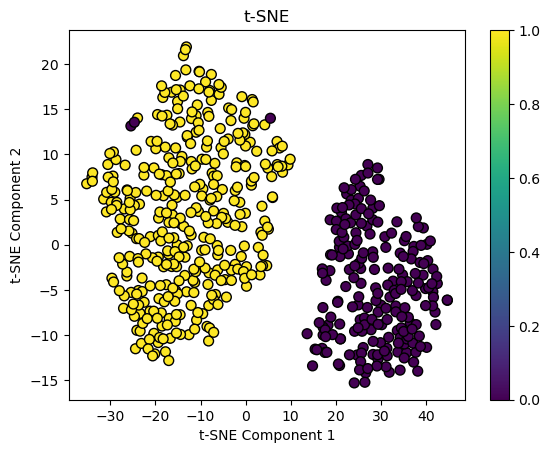

In [81]:
# Plot tsne
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()

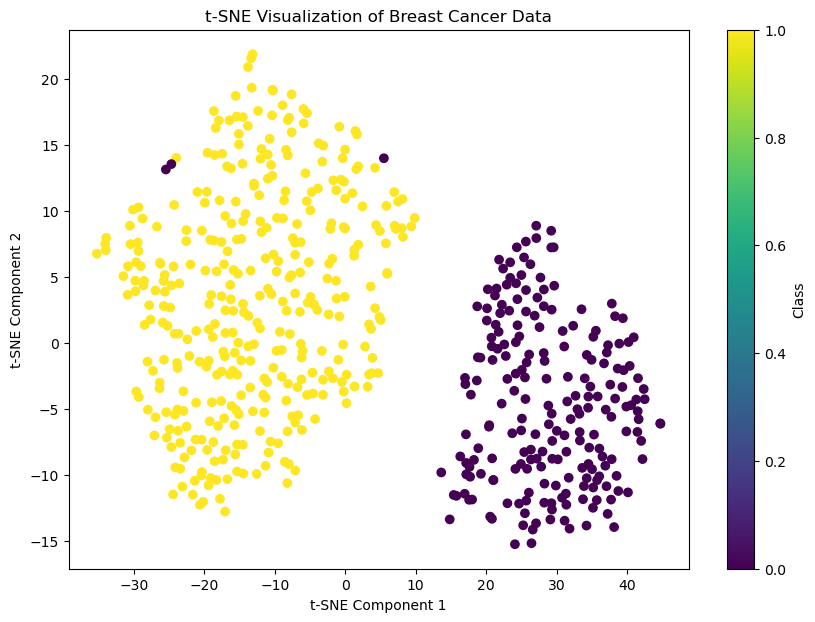

In [82]:
# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', marker='o')
plt.title('t-SNE Visualization of Breast Cancer Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Class')
plt.show()

 ## Cluster Analysis

By visualizing the clusters formed in the t-SNE plot, you can assess the natural grouping of data points. This can be useful for identifying subgroups within the breast cancer dataset.
## Anomaly Detection

t-SNE can help in detecting anomalies or outliers in the dataset by showing data points that are isolated from the main clusters.

## Feature Importance

Although t-SNE is not typically used for feature importance directly, the visualization might give hints about which features could be influential. Further analysis with techniques like SHAP values or feature importance from tree-based models can complement this.

## Model Evaluation

Use t-SNE to visualize the outputs of your model. For instance, if you have a classifier, you can visualize the true labels and the predicted labels to see where your model is performing well or poorly.

## Exploratory Data Analysis (EDA)

t-SNE is a great tool for EDA, helping to uncover underlying patterns and relationships in the breast cancer dataset that might not be obvious through other means.

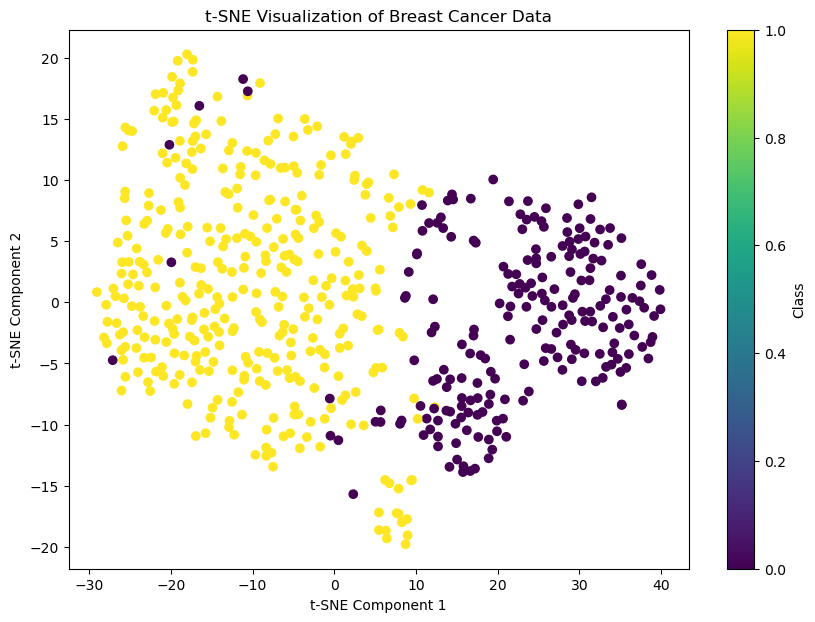

In [84]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the t-SNE result
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', marker='o')
plt.title('t-SNE Visualization of Breast Cancer Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Class')
plt.show()

## MDS (Multidimensional Scaling)
Multidimensional Scaling (MDS) is another dimensionality reduction technique that can be used for visualizing the structure of high-dimensional data in a lower-dimensional space, typically 2D or 3D. MDS aims to preserve the pairwise distances between data points as much as possible in the reduced dimensional space. This can be particularly useful for exploring the relationships within your breast cancer dataset.

C:\Anaconda\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


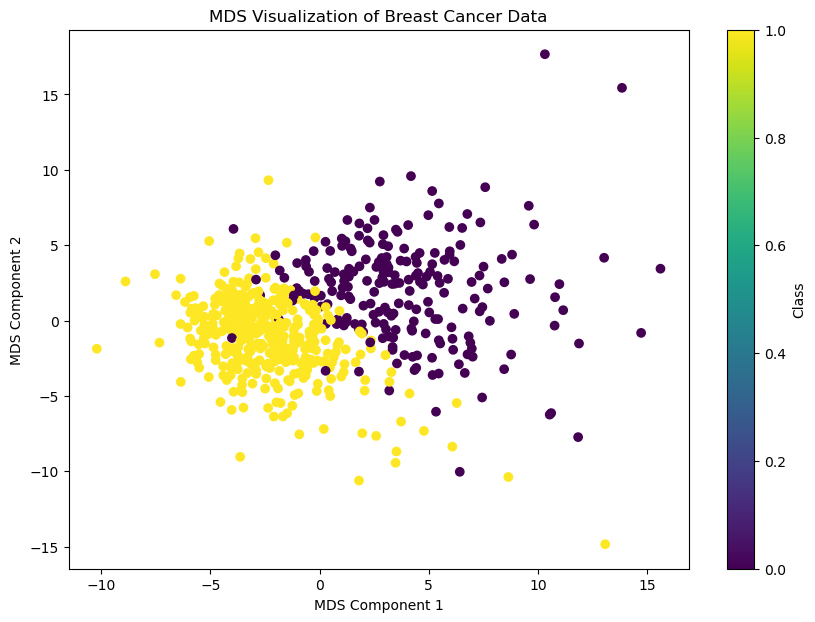

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
# Apply MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

# Plot the MDS result
plt.figure(figsize=(10, 7))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap='viridis', marker='o')
plt.title('MDS Visualization of Breast Cancer Data')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.colorbar(label='Class')
plt.show()

Graph Explanation

    Axes (MDS Component 1 and MDS Component 2)
        The graph has two axes labeled "MDS Component 1" and "MDS Component 2". These components represent the new dimensions created by MDS. Unlike the original features, these components don't have a direct interpretation but are linear combinations of the original features optimized to preserve pairwise distances.
    Data Points
        Each point on the graph represents a single sample from the breast cancer dataset. The position of each point is determined by the new MDS coordinates.
    Color Coding
        The points are colored according to their class labels (e.g., malignant vs. benign). In this case, c=y means the color corresponds to the target variable (e.g., different colors for different classes).
    Clusters
        Clusters of points in the graph indicate that those samples are more similar to each other in the original high-dimensional space. If you see distinct clusters, it suggests that the MDS has effectively captured some of the structure in the data.
    Title and Labels
        The graph title "MDS Visualization of Breast Cancer Data" provides context for what the visualization represents.
        The x-axis is labeled "MDS Component 1" and the y-axis is labeled "MDS Component 2", which are the dimensions created by MDS.

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'target'

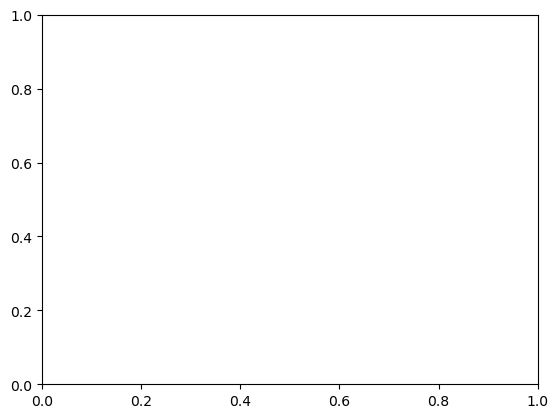

In [93]:
import matplotlib.pyplot as plt

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c= 'target')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of Reduced Data')
plt.show()